In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 41절: 주성분 분석

# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업

## 차원 축소

고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄임

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 함 


## PCA와 고유값 분해

직교 변환 행렬 W 을 찾는 것과 동일

직교행렬 : 어떤행렬이 그 행렬의 전치행렬과 그 행렬의 역행렬이 서로 같을때 어떤 행렬

W 값은 공분산 행렬  XXT 의 고유값 분해(eigenvalue decomposition)를 사용하여 찾을 수 있다. W 의 각 열은 가장 큰 고유값부터 D 개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다.


### Scikit-Learn 의 PCA 기능
**  PCA 클래스 **

* 입력 인수:
    - n_components : 정수
         최종 성분의 수


* 속성:
    - components_
         주성분 축
    - n_components_
         주성분의 수
    - mean_ :
         각 성분의 평균
    - explained_variance_ratio_
         각 성분의 분산 비율
         
         
* 주성분 분석 참고 <br>

http://antilibrary.org/1091

    주성분 분석은 데이터를 한개의 축으로 사상시켰을 때 그 분산이 가장 커지는 축
    새로운 좌표계로 데이터를 선형 변환
    주로 분산을 그대로 유지하고 고차원에서 저차원으로 축소 할 수 있도록 함 
    
https://wikidocs.net/7646

    그림4 참고 분산이 클수록 원래 데이터의 형태를 반영 할 수 있다. 
    
    
* 공분산 
    
    둘 이상의 변량이 연관성을 가지며 분포하는 모양을 전체적으로 나타낸 분산 
    

## 2차원 PCA의 예

(-4, 4)

(-3, 3)

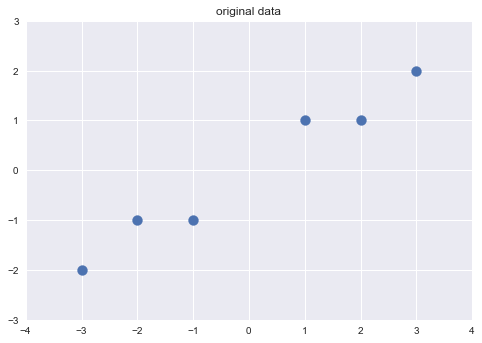

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# X 값들에 대해서 바뀐 차원의 x,y 값
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [7]:
# pca.get_covariance() 공분산 np.linalg.eig() 고유값 
w, V = np.linalg.eig(pca.get_covariance())
w, V

(array([ 6.61628593,  0.05038073]), array([[ 0.83849224, -0.54491354],
        [ 0.54491354,  0.83849224]]))

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [8]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

(-4, 4)

(-3, 3)

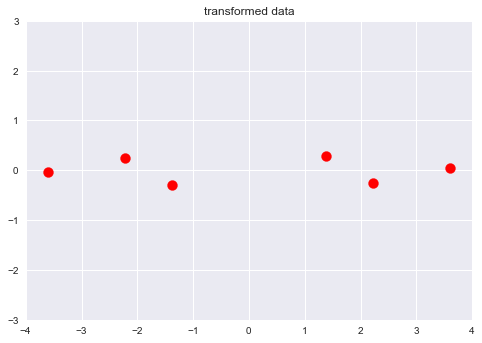

In [9]:
# 새로운 차원에 -1~1 까지의 값으로 정규화 시킨것
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()